In [31]:
from matplotlib import pyplot as plt
from skimage import *
from skimage.transform import hough_line_peaks
import numpy as np
import cv2



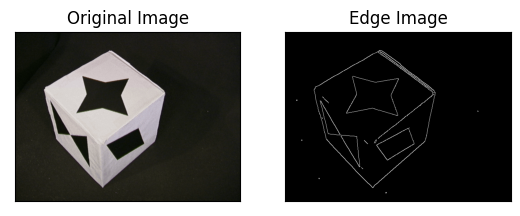

In [21]:
# 7.1

img = cv2.imread('Box3.bmp')
img = img[:,:,::-1]

edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
# 7.2
hspace, angles, dists = skimage.transform.hough_line(edges)

print(hspace,angles,dists)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [-1.57079633 -1.55334303 -1.53588974 -1.51843645 -1.50098316 -1.48352986
 -1.46607657 -1.44862328 -1.43116999 -1.41371669 -1.3962634  -1.37881011
 -1.36135682 -1.34390352 -1.32645023 -1.30899694 -1.29154365 -1.27409035
 -1.25663706 -1.23918377 -1.22173048 -1.20427718 -1.18682389 -1.1693706
 -1.15191731 -1.13446401 -1.11701072 -1.09955743 -1.08210414 -1.06465084
 -1.04719755 -1.02974426 -1.01229097 -0.99483767 -0.97738438 -0.95993109
 -0.9424778  -0.9250245  -0.90757121 -0.89011792 -0.87266463 -0.85521133
 -0.83775804 -0.82030475 -0.80285146 -0.78539816 -0.76794487 -0.75049158
 -0.73303829 -0.71558499 -0.6981317  -0.68067841 -0.66322512 -0.64577182
 -0.62831853 -0.61086524 -0.59341195 -0.57595865 -0.55850536 -0.54105207
 -0.52359878 -0.50614548 -0.48869219 -0.4712389  -0.45378561 -0.43633231
 -0.41887902 -0.40142573 -0.38397244 -0.36651914 -0.34906585 -0.33161256
 -0.3

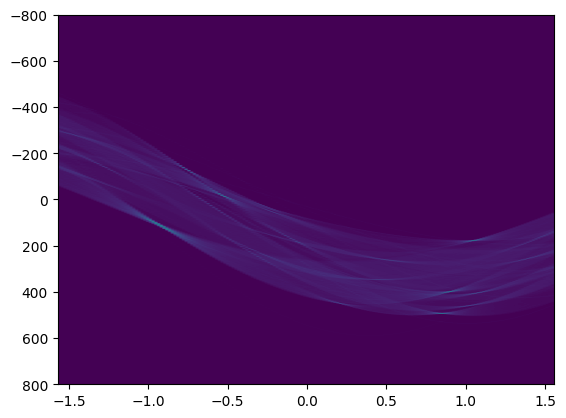

In [23]:
# 7.3

extent = [angles[0], angles[-1], dists[-1], dists[0]]
plt.imshow(hspace, extent=extent, aspect='auto')


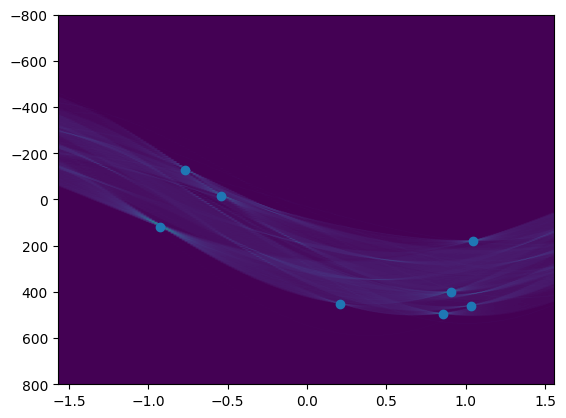

In [29]:
# 7.4
extH, extAngles, extDists = hough_line_peaks(hspace, angles, dists)
extent = [angles[0], angles[-1], dists[-1], dists[0]]


plt.figure()
plt.imshow(hspace, extent=extent, aspect='auto')
plt.scatter(extAngles,extDists)

8


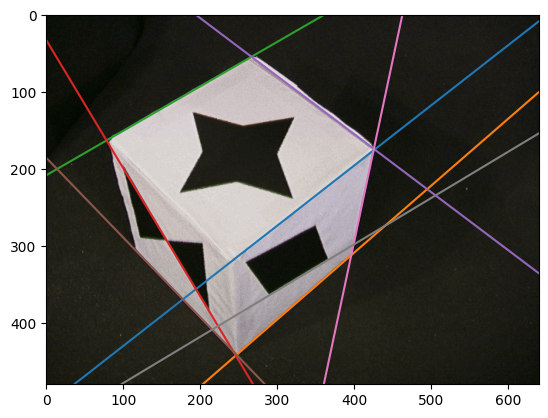

In [42]:
# 7.5

def DrawLine(l, shape):
    #Checks where the line intersects the four sides of the image
    # and finds the two intersections that are within the frame
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    if (len(P)==0):
        print("Line is completely outside image")
    plt.plot(*np.array(P).T)



plt.figure()
plt.imshow(img)
for ang,dist in zip(extAngles,extDists):
    DrawLine(np.array([np.cos(ang),np.sin(ang),-dist]),img.shape)

print(np.size(extAngles))




[[ 2.70106339 -2.40114788 -4.47143067]]


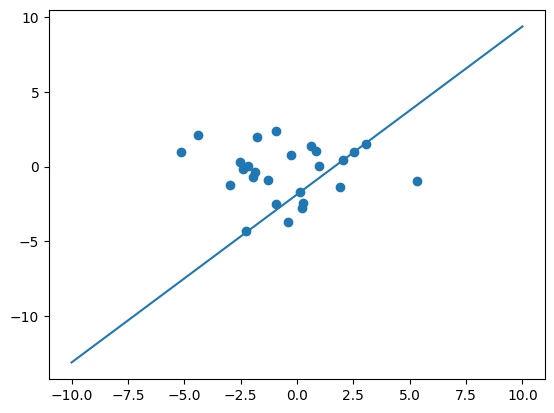

In [100]:
# 7.6

def test_points(n_in, n_out):
    a = (np.random.rand(n_in)-.5)*10
    b = np.vstack((a, a*.5+np.random.randn(n_in)*.25))
    points = np.hstack((b, 2*np.random.randn(2, n_out)))
    return np.random.permutation(points.T).T

def PiInv(p):
    H = np.shape(p)[1]
    homo = np.ones((1, H))
    ph = np.concatenate((p,homo),axis = 0)
    return ph


def liner(points):
    p1 = PiInv(points[:,0].reshape(2,1))
    p2 = PiInv(points[:,1].reshape(2,1))
    print(np.cross(p1.T,p2.T))
    return np.cross(p1.T,p2.T)

points = np.array(test_points(1,25))

line = liner(points)


x = np.linspace(-10,10)
line = -line[:,0]/line[:,1]*x-line[:,2]/line[:,1]

plt.figure()
plt.scatter(points[0],points[1])
plt.plot(x,line)
plt.show()



[[ 0.87584644 -2.54872497 -1.36891326]]


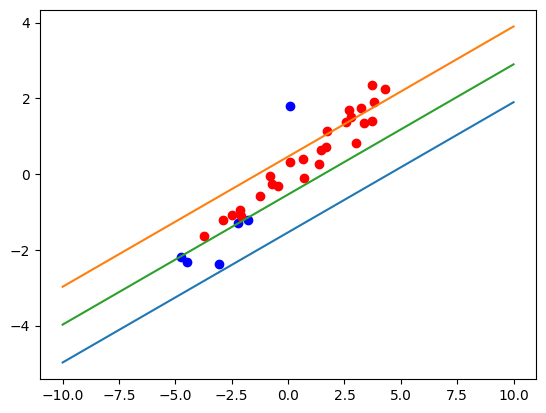

In [163]:
# 7.7

points = np.array(test_points(30,2))

line = liner(points)

x = np.linspace(-10,10)
a = line[:,0]/line[:,1]
b = line[:,2]/line[:,1]
line = -line[:,0]/line[:,1]*x-line[:,2]/line[:,1]

upper_line = line + 1
lower_line = line - 1

inner = []
outer = []

thresh = 1

for point in points.T:
    if -point[0]*a-b+thresh >= point[1] and -point[0]*a-b-thresh < point[1]:
        inner.append(point)
    else:
        outer.append(point)


outer = np.array(outer)
inner = np.array(inner)

plt.figure()
plt.scatter(outer[:,0],outer[:,1],color="blue")
plt.scatter(inner[:,0],inner[:,1],color="red")
plt.plot(x,lower_line)
plt.plot(x,upper_line)
plt.plot(x,line)
plt.show()

